In [ ]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 5705, done.
remote: Total 5705 (delta 0), reused 0 (delta 0), pack-reused 5705
Receiving objects: 100% (5705/5705), 13.36 MiB | 5.38 MiB/s, done.
Resolving deltas: 100% (3831/3831), done.


In [ ]:
%cd keras-retinanet/
!pip install .

/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=170094 sha256=ddef25edd7fccd7959fad940d8d48cb5d93186aed719350efa52d57febf0251c
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.1.0-py2.py3-none-any.whl size=13346 sha256=45e9916c5654d73e6d92367e7b89c6c42541131794a49317ed5993e58e1e24b2
  Stored in directory: /root/.cache/pip/wheels/80/dd/ac/842235b63dddac12faa4b48ebe58b8944e8c2e57c2e38dddb6
Successfully built keras-retinanet keras-resnet


In [ ]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/keras_retinanet
creating build/temp.linux-x86_64-3.6/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -c keras_retinanet/utils/compute_overlap.c -o build/temp.linux-x86_64-3.6/keras_retinanet/utils/compute_over

In [ ]:
# !pip install keras==2.3.1
# !pip install tensorflow==2.1.0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import requests
import urllib
import os
from PIL import Image

from keras_retinanet import models
from keras_retinanet.utils.image import preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

In [ ]:
# https://www.kaggle.com/dataturks/face-detection-in-images
%cd ..
!wget -nc https://lazyprogrammer.me/course_files/face_detection.json

/content
--2020-05-09 05:13:20--  https://lazyprogrammer.me/course_files/face_detection.json
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 104.31.80.48, 2606:4700:3037::681f:5030, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 273830 (267K) [application/json]
Saving to: ‘face_detection.json’

face_detection.json 100%[===================>] 267.41K   286KB/s    in 0.9s    

2020-05-09 05:13:22 (286 KB/s) - ‘face_detection.json’ saved [273830/273830]



In [ ]:
!head face_detection.json

{"content": "http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb064277d86016431e33e4e003d/8186c3d1-e9d4-4550-8ec1-a062a7628787___0-26.jpg.jpeg","annotation":[{"label":["Face"],"notes":"","points":[{"x":0.08615384615384615,"y":0.3063063063063063},{"x":0.1723076923076923,"y":0.45345345345345345}],"imageWidth":650,"imageHeight":333},{"label":["Face"],"notes":"","points":[{"x":0.583076923076923,"y":0.2912912912912913},{"x":0.6584615384615384,"y":0.46846846846846846}],"imageWidth":650,"imageHeight":333}],"extras":null}
{"content": "http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb064277d86016431e33e4e003d/d1c32c8e-8050-482d-a6c8-b101ccba5b65___0de0ee708a4a47039e441d488615ebb7.png","annotation":[{"label":["Face"],"notes":"","points":[{"x":0.7053087757313109,"y":0.23260437375745527},{"x":0.7692307692307693,"y":0.36182902584493043}],"imageWidth":1280,"imageHeight":697}],"extras":null}
{"content": "http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb064277d86016431e33e4e00

In [ ]:
import json
j = json.loads(open('face_detection.json').readline())

In [ ]:
j

{'annotation': [{'imageHeight': 333,
   'imageWidth': 650,
   'label': ['Face'],
   'notes': '',
   'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
    {'x': 0.1723076923076923, 'y': 0.45345345345345345}]},
  {'imageHeight': 333,
   'imageWidth': 650,
   'label': ['Face'],
   'notes': '',
   'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
    {'x': 0.6584615384615384, 'y': 0.46846846846846846}]}],
 'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb064277d86016431e33e4e003d/8186c3d1-e9d4-4550-8ec1-a062a7628787___0-26.jpg.jpeg',
 'extras': None}

In [ ]:
df = pd.read_json('face_detection.json', lines=True)

In [ ]:
df.head()

,content,annotation,extras
0,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['Face'], 'notes': '', 'points': [{...",NaN
1,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['Face'], 'notes': '', 'points': [{...",NaN
2,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['Face'], 'notes': '', 'points': [{...",NaN
3,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['Face'], 'notes': '', 'points': [{...",NaN
4,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['Face'], 'notes': '', 'points': [{...",NaN


In [ ]:
df.shape

(409, 3)

In [ ]:
r = requests.get('http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb064277d86016431e33e4e003d/8186c3d1-e9d4-4550-8ec1-a062a7628787___0-26.jpg.jpeg')
with open('testimg.jpg', 'wb') as f:
  f.write(r.content)

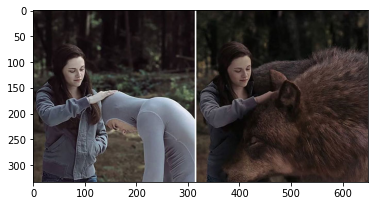

In [ ]:
im = Image.open('testimg.jpg')
plt.imshow(im)

In [ ]:
converted_data_train = {
    'image_name': [],
    'x_min': [],
    'y_min': [],
    'x_max': [],
    'y_max': [],
    'class_name': [],
}

converted_data_test = {
    'image_name': [],
    'x_min': [],
    'y_min': [],
    'x_max': [],
    'y_max': [],
    'class_name': [],
}

In [ ]:
if not os.path.exists('faces'):
  os.mkdir('faces')

In [ ]:
idx = 0 # global counter for filenames

def map_to_data(row, converted_data):
  global idx
  r = requests.get(row['content'])
  filepath = 'faces/face_%s.jpg' % idx

  # don't bother to overwrite
  if not os.path.exists(filepath):
    with open(filepath, 'wb') as f:
      f.write(r.content)

  # there could be more than 1 face per image
  for anno in row['annotation']:
    converted_data['image_name'].append(filepath)

    width = anno['imageWidth']
    height = anno['imageHeight']

    # calculate box coordinates
    x1 = int(round(anno['points'][0]['x'] * width))
    y1 = int(round(anno['points'][0]['y'] * height))
    x2 = int(round(anno['points'][1]['x'] * width))
    y2 = int(round(anno['points'][1]['y'] * height))

    converted_data['x_min'].append(x1)
    converted_data['y_min'].append(y1)
    converted_data['x_max'].append(x2)
    converted_data['y_max'].append(y2)

    # they are all the same class
    converted_data['class_name'].append('face')
  
  # update counter
  idx += 1

In [ ]:
# we must split BEFORE converting the data
# after converting the data, multiple rows will have the same image
# we won't want to split then3
train_df, test_df = train_test_split(df, test_size=0.2)

In [ ]:
# this will be slow since it has to download all the images

# just in case we run again later
idx = 0

# train
train_df.apply(lambda row: map_to_data(row, converted_data_train), axis=1)

# test
test_df.apply(lambda row: map_to_data(row, converted_data_test), axis=1)

20     None
128    None
226    None
69     None
28     None
       ... 
219    None
300    None
335    None
347    None
178    None
Length: 82, dtype: object

In [ ]:
# this will overwrite the previous dfs
train_df = pd.DataFrame(converted_data_train)
test_df = pd.DataFrame(converted_data_test)
train_df.head()

,image_name,x_min,y_min,x_max,y_max,class_name
0,faces/face_0.jpg,533,131,617,237,face
1,faces/face_1.jpg,35,12,142,185,face
2,faces/face_1.jpg,165,44,251,155,face
3,faces/face_1.jpg,266,43,390,190,face
4,faces/face_2.jpg,67,91,163,240,face


In [ ]:
train_df.shape

(1038, 6)

In [ ]:
train_df[train_df['image_name'] == 'faces/face_1.jpg']

,image_name,x_min,y_min,x_max,y_max,class_name
1,faces/face_1.jpg,35,12,142,185,face
2,faces/face_1.jpg,165,44,251,155,face
3,faces/face_1.jpg,266,43,390,190,face


In [ ]:
def show_image_with_boxes(df):
  # pick a random image
  filepath = df.sample()['image_name'].values[0]

  # get all rows for this image
  df2 = df[df['image_name'] == filepath]
  im = np.array(Image.open(filepath))

  # if there's a PNG it will have alpha channel
  im = im[:,:,:3]

  for idx, row in df2.iterrows():
    box = [
      row['x_min'],
      row['y_min'],
      row['x_max'],
      row['y_max'],
    ]
    print(box)
    draw_box(im, box, color=(255, 0, 0))

  plt.axis('off')
  plt.imshow(im)
  plt.show()

[114, 147, 191, 232]
[65, 176, 124, 253]
[318, 152, 390, 240]
[399, 159, 453, 239]
[478, 193, 546, 264]
[682, 143, 806, 275]
[901, 168, 995, 283]
[597, 198, 663, 258]
[224, 200, 293, 258]
[11, 172, 48, 233]
[632, 170, 659, 197]


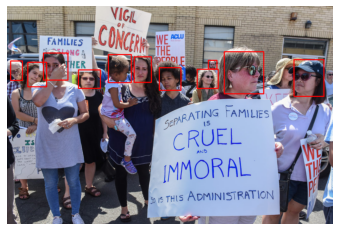

In [ ]:
show_image_with_boxes(train_df)

In [ ]:
train_df.to_csv('annotations.csv', index=False, header=None)

In [ ]:
classes = ['face']
with open('classes.csv', 'w') as f:
  for i, class_name in enumerate(classes):
    f.write(f'{class_name},{i}\n')

In [ ]:
!head classes.csv

face,0


In [ ]:
!head annotations.csv

faces/face_0.jpg,533,131,617,237,face
faces/face_1.jpg,35,12,142,185,face
faces/face_1.jpg,165,44,251,155,face
faces/face_1.jpg,266,43,390,190,face
faces/face_2.jpg,67,91,163,240,face
faces/face_2.jpg,202,102,329,244,face
faces/face_2.jpg,317,19,525,269,face
faces/face_3.jpg,216,12,279,80,face
faces/face_3.jpg,289,2,343,74,face
faces/face_4.jpg,340,93,494,234,face


In [ ]:
if not os.path.exists('snapshots'):
  os.mkdir('snapshots')

In [ ]:
PRETRAINED_MODEL = 'snapshots/_pretrained_model.h5'

URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Downloaded pretrained model to snapshots/_pretrained_model.h5


In [ ]:
!ls keras-retinanet

build		 images		  README.md	    setup.py
CONTRIBUTORS.md  keras_retinanet  requirements.txt  snapshots
examples	 LICENSE	  setup.cfg	    tests


In [ ]:
batch_size = 8
num_images = len(train_df.groupby('image_name'))
steps_per_epoch = num_images // batch_size + 1
steps_per_epoch

In [ ]:
!keras-retinanet/keras_retinanet/bin/train.py --freeze-backbone \
  --random-transform \
  --weights {PRETRAINED_MODEL} \
  --batch-size {batch_size} \
  --steps {steps_per_epoch} \
  --epochs 15 \
  csv annotations.csv classes.csv

Using TensorFlow backend.
2020-05-09 05:47:42.226060: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Creating model, this may take a second...
2020-05-09 05:47:43.979084: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-05-09 05:47:43.984053: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-05-09 05:47:43.984529: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-05-09 05:47:43.984570: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-

In [ ]:
!ls snapshots

_pretrained_model.h5  resnet50_csv_04.h5  resnet50_csv_08.h5
resnet50_csv_01.h5    resnet50_csv_05.h5  resnet50_csv_09.h5
resnet50_csv_02.h5    resnet50_csv_06.h5  resnet50_csv_10.h5
resnet50_csv_03.h5    resnet50_csv_07.h5


In [ ]:
from glob import glob
model_paths = glob('snapshots/resnet50_csv_*.h5')
latest_path = sorted(model_paths)[-1]
print("path:", latest_path)

model = models.load_model(latest_path, backbone_name='resnet50')
model = models.convert_model(model)

label_map = {}
for line in open('classes.csv'):
  row = line.rstrip().split(',')
  label_map[int(row[1])] = row[0]

path: snapshots/resnet50_csv_10.h5


Using TensorFlow backend.


tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

In [ ]:
def show_image_with_predictions(df, threshold=0.6):
  # choose a random image
  row = df.sample()
  filepath = row['image_name'].values[0]
  print("filepath:", filepath)

  # get all rows for this image
  df2 = df[df['image_name'] == filepath]
  im = np.array(Image.open(filepath))
  print("im.shape:", im.shape)

  # if there's a PNG it will have alpha channel
  im = im[:,:,:3]

  # plot true boxes
  for idx, row in df2.iterrows():
    box = [
      row['x_min'],
      row['y_min'],
      row['x_max'],
      row['y_max'],
    ]
    print(box)
    draw_box(im, box, color=(255, 0, 0))
  
  ### plot predictions ###

  # get predictions
  imp = preprocess_image(im)
  imp, scale = resize_image(im)

  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(imp, axis=0)
  )

  # standardize box coordinates
  boxes /= scale

  # loop through each prediction for the input image
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can quit as soon
    # as we see a score below threshold
    if score < threshold:
      break

    box = box.astype(np.int32)
    color = label_color(label)
    draw_box(im, box, color=color)

    class_name = label_map[label]
    caption = f"{class_name} {score:.3f}"
    draw_caption(im, box, caption)

  plt.axis('off')
  plt.imshow(im)
  plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]

filepath: faces/face_151.jpg
im.shape: (600, 940, 3)
[91, 90, 283, 364]
[298, 65, 483, 289]
[503, 135, 633, 311]
[654, 162, 819, 358]


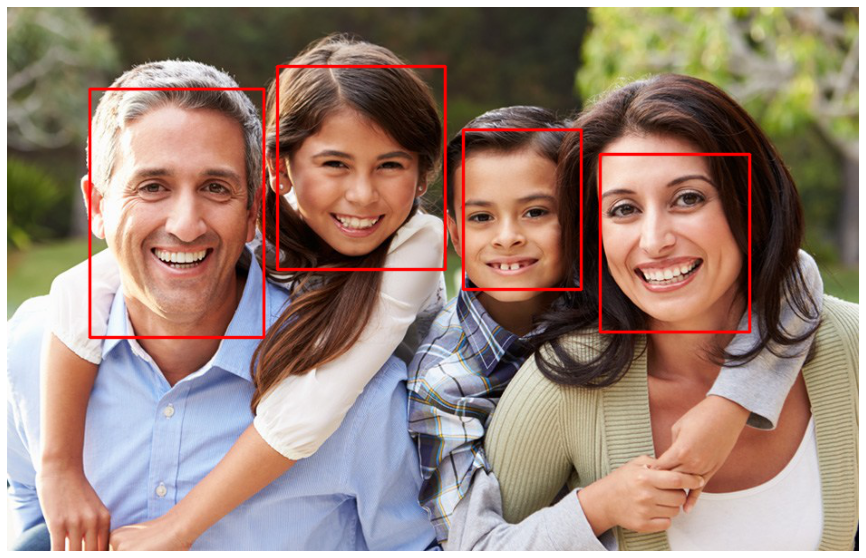

In [ ]:
show_image_with_predictions(train_df, threshold=0.3)

filepath: faces/face_375.jpg
im.shape: (508, 742, 3)
[25, 122, 137, 247]
[161, 70, 308, 254]
[354, 72, 520, 280]
[550, 81, 708, 256]


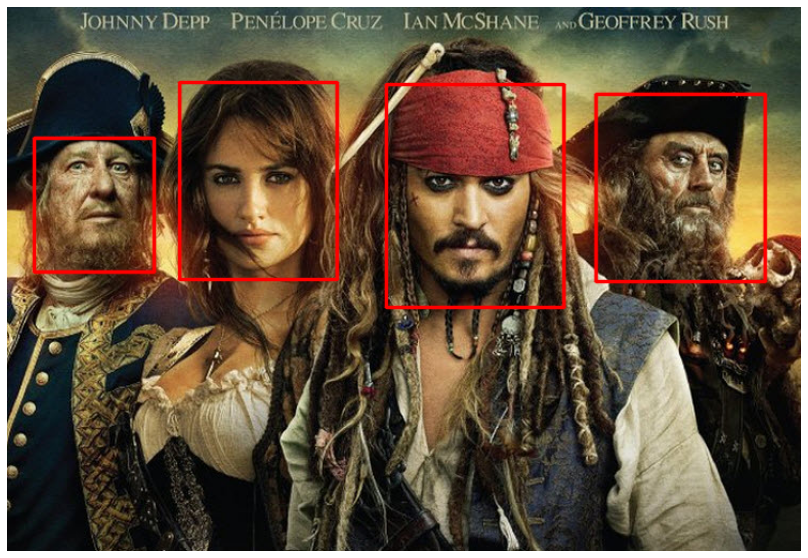

In [ ]:
show_image_with_predictions(test_df, threshold=0.4)